In [ ]:
#

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("50_Startups.csv") 

In [3]:
df.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.tail() 

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
df.shape 

(50, 5)

In [6]:
df.size 

250

In [7]:
df.isna().sum() 

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
df.describe() 

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
df.corr() 

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


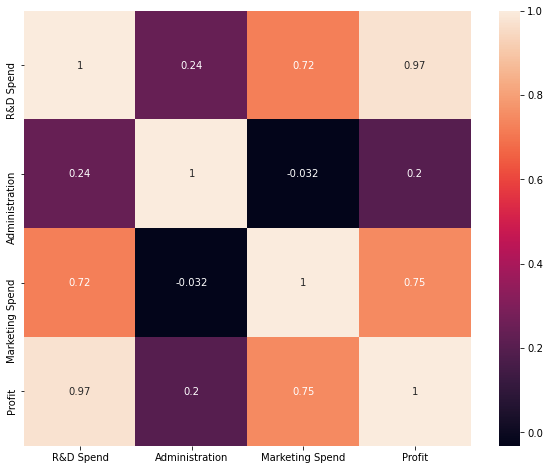

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True); 

In [12]:
df1=pd.get_dummies(df['State'],drop_first=True) 

In [13]:
df1.head() 

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0


In [14]:
df2=pd.concat([df,df1],axis=1) 
df2.head() 

,R&D Spend,Administration,Marketing Spend,State,Profit,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,1
1,162597.70,151377.59,443898.53,California,191792.06,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,1,0


In [15]:
df2.drop(["State"],axis=1,inplace=True) 

In [16]:
df2.head() 

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [17]:
# boxplot 

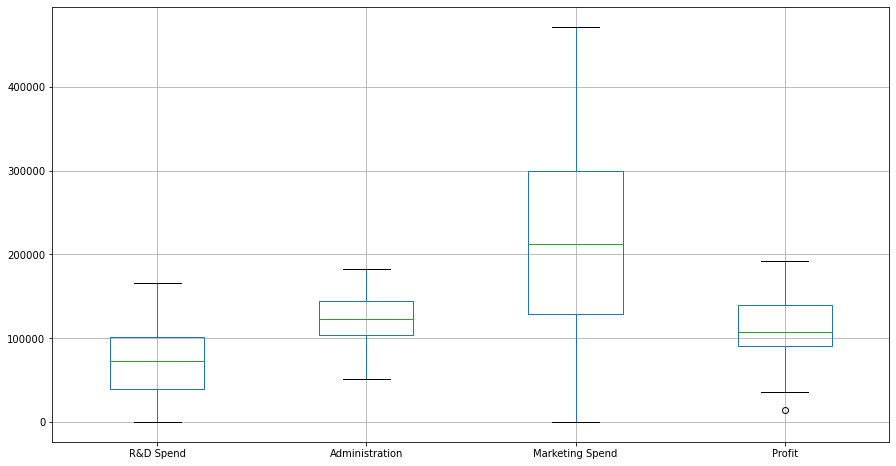

In [18]:
plt.figure(figsize=(15,8)) 
df.boxplot(); 

# Outlier

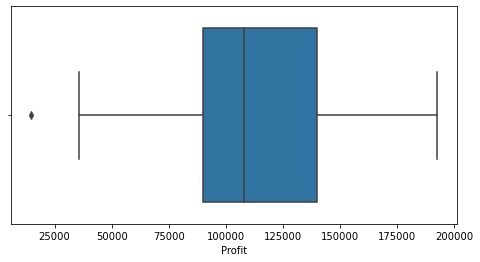

In [19]:
plt.figure(figsize =(8,4)) 
sns.boxplot(x = 'Profit', data=df2, orient='h'); 

# Stadardisation

In [20]:
X=df2.drop('Profit',axis=1) 
y=df2['Profit'] 

In [21]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaled = scaler.fit_transform(X) 

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,y,test_size=0.30,random_state=42)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
Reg_predict=reg.predict(X_test) 

In [23]:
Std=reg.score(X_train, y_train)  
Std

0.9511471170962384

In [24]:
Stdr=reg.score(X_test, y_test) 
Stdr

0.9397108063355788

#  1] Simple Regression

In [25]:
X=df2['R&D Spend'].values.reshape(-1,1) # INDEP 
y=df2['Profit'].values                  # DEPE  

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2)

In [27]:
from sklearn.linear_model import LinearRegression 
reg = LinearRegression() 

In [28]:
reg.fit(X_train, y_train) 

LinearRegression()

In [29]:
reg.coef_ 

array([0.83681219])

In [30]:
reg.intercept_ 

50624.230222445796

In [31]:
Accu_S=reg.score(X_train,y_train)
Accu_S

0.9342112674364689

In [32]:
accu_S=reg.score(X_test,y_test)
accu_S

0.9650191803768702

In [33]:
y_test_pred=reg.predict(X_test) 

In [34]:
y_train_pred=reg.predict(X_train) 

# M_S_E
## Performance Metric

In [35]:
from sklearn.metrics import mean_squared_error  

In [36]:
mean_squared_error(y_train,y_train_pred)

96352524.37605822

In [37]:
mean_squared_error(y_test,y_test_pred) 

61322263.46068803

# M_A_E

In [38]:
from sklearn.metrics import mean_absolute_error 

In [39]:
mean_absolute_error(y_train,y_train_pred)

7172.887211723587

In [40]:
mean_absolute_error(y_test,y_test_pred)

6353.738251658806

# R_M_S_E

In [41]:
np.sqrt(mean_squared_error(y_train,y_train_pred))  

9815.932170510257

In [42]:
np.sqrt(mean_squared_error(y_test,y_test_pred)) 

7830.853303484112

# R2
## Coefficient of Determination R2

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_train,y_train_pred)

0.9342112674364689

In [45]:
r2_score(y_test,y_test_pred)

0.9650191803768702

# R2 And MSE 

In [46]:
from sklearn import metrics 
print("R score",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))

R score 0.9342112674364689
MSE =  96352524.37605822


# Cross Validation

In [47]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold 

0.8935536426457651

# Regularization : Ridge(L2)

In [48]:
from sklearn import linear_model 
ridge_reg= linear_model.Ridge(alpha=500, max_iter=100, tol=0.01)
ridge_reg.fit(X_train, y_train)  

Ridge(alpha=500, max_iter=100, tol=0.01)

In [49]:
ridge_reg.score(X_train, y_train)  

0.9342112674364689

In [50]:
ridge_reg.score(X_test, y_test) 

0.9650191795043603

# Lasso(L1) 

In [51]:
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=500, max_iter=100, tol=0.01)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=500, max_iter=100, tol=0.01)

In [52]:
lasso_reg.score(X_train, y_train)

0.9342112674363815

In [53]:
lasso_reg.score(X_test, y_test)

0.9650191438837108

# Elastic Net 

In [54]:
from sklearn.linear_model import ElasticNet
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(X_train, y_train)
en_model_pred = en_mod.predict(X_test)

In [55]:
en_mod.score(X_train, y_train) 

0.9342112674364689

In [56]:
en_mod.score(X_test, y_test) 

0.9650191803755296

# Miltiple Linear Regression

In [57]:
X = df2.drop('Profit', axis=1)
y = df2['Profit'] 

In [58]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2) 

In [59]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [60]:
reg.fit(X_train,y_train)

LinearRegression()

In [61]:
reg.coef_

array([ 8.12994089e-01, -9.70560235e-02,  2.38615389e-02, -2.20799113e+03,
        2.65012097e+03])

In [62]:
reg.intercept_

58981.784433547524

In [63]:
Accu_M=reg.score(X_train,y_train)
Accu_M

0.944558949540784

In [64]:
accu_M=reg.score(X_test,y_test)
accu_M

0.9435724651476849

In [65]:
y_test_pred=(reg.predict(X_test))

In [66]:
y_train_pred=(reg.predict(X_train))

# M_S_E

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
mean_squared_error(y_train,y_train_pred)

81197569.21365394

In [69]:
mean_squared_error(y_test,y_test_pred)

98918898.86887772

# M_A_E

In [70]:
from sklearn.metrics import mean_absolute_error

In [71]:
mean_absolute_error(y_train,y_train_pred)

6146.250241192179

In [72]:
mean_absolute_error(y_test,y_test_pred)

7992.7141631450695

# R_N_S_E

In [73]:
np.sqrt(mean_squared_error(y_train,y_train_pred))

9010.969382572217

In [74]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

9945.798050879463

# R2

In [75]:
from sklearn.metrics import r2_score

In [76]:
r2_score(y_train,y_train_pred)

0.944558949540784

In [77]:
r2_score(y_test,y_test_pred)

0.9435724651476849

# R2 And MSE

In [78]:
from sklearn import metrics
print("R score",metrics.r2_score(y_train,y_train_pred))
print("MSE = ", metrics.mean_squared_error(y_train,y_train_pred))

R score 0.944558949540784
MSE =  81197569.21365394


# Cross Validation

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds=KFold(n_splits = 10, shuffle=True, random_state=42)
scores=cross_val_score(reg,X_train,y_train, scoring='r2', cv=folds)
scores
accuracy_fold=np.mean(abs(scores))
accuracy_fold

0.8864034724164623

# Regularization : Lasso(L2)

In [80]:
from sklearn import linear_model 
ridge_reg1= linear_model.Ridge(alpha=50, max_iter=100, tol=0.1) 
ridge_reg.fit(X_train, y_train) 

Ridge(alpha=500, max_iter=100, tol=0.01)

In [81]:
ridge_reg.score(X_train, y_train) 

0.942176506541555

In [82]:
ridge_reg.score(X_test, y_test) 

0.9576459111771967

# Lasso(L1)

In [83]:
from sklearn import linear_model 
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.01)
lasso_reg.fit(X_train, y_train) 

Lasso(alpha=50, max_iter=100, tol=0.01)

In [84]:
lasso_reg.score(X_train, y_train) 

0.9445477488949683

In [85]:
lasso_reg.score(X_test, y_test) 

0.9447104454009492

# Elastic Net

In [86]:
from sklearn.linear_model import ElasticNet
en_mod = ElasticNet(alpha=0.02)
en_mod.fit(X_train, y_train)

ElasticNet(alpha=0.02)

In [87]:
en_mod.score(X_train, y_train) 

0.9445564541751735

In [88]:
en_mod.score(X_test, y_test) 

0.944110368049996

# Grid Search CV

In [89]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
scores = cross_val_score(lm, X_train, y_train, scoring='r2', cv=10)
print('scores',scores)
accuracy_regfold=np.mean(abs(scores))
print('\nCV mean',accuracy_regfold) 

scores [0.93751321 0.84515582 0.99378907 0.89527516 0.98016953 0.88303448
 0.91985941 0.82872454 0.97876293 0.67634355]

CV mean 0.8938627696204282


In [90]:
from sklearn.feature_selection import RFE

In [91]:
folds = KFold(n_splits = 8, shuffle = True, random_state = 45)

In [92]:
hyper_params = [{'n_features_to_select': list(range(1, 8))}]

In [93]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm) 

In [94]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      
model_cv.fit(X_train, y_train) 

Fitting 8 folds for each of 7 candidates, totalling 56 fits


GridSearchCV(cv=KFold(n_splits=8, random_state=45, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7]}],
             return_train_score=True, scoring='r2', verbose=1)

In [95]:
model_cv.best_estimator_

RFE(estimator=LinearRegression(), n_features_to_select=5)

In [96]:
# final model
n_features_optimal = 3

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
import sklearn.metrics
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.9435724651476849


# Result

In [97]:
# Train Accuracy
print("Simplae Linear Regression= {} \nMiltiple Linear Regression = {} \nStadardisation = {} ".format(Accu_S,Accu_M,Std))

Simplae Linear Regression= 0.9342112674364689 
Miltiple Linear Regression = 0.944558949540784 
Stadardisation = 0.9511471170962384 


In [98]:
# Test Accueacy
print("Simplae Linear Regression= {} \nMiltiple Linear Regression = {} \nStadardisation = {}".format(accu_S,accu_M,Stdr))

Simplae Linear Regression= 0.9650191803768702 
Miltiple Linear Regression = 0.9435724651476849 
Stadardisation = 0.9397108063355788


# Multiple Linear Regression is Best Module,